In [ ]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
import datetime
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
from numpy import mean,absolute 
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from scipy.signal import *
def mad(data):
    return mean(absolute(data-mean(data)))


plt.rcParams['figure.figsize'] = [40, 30]

In [12]:

plt.rcParams['figure.figsize'] = [40, 30]


In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 9))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(300, length):
    cci_absolute_edge = 500
    himax[i] = RS_F[i]*cci_absolute_edge-100#CCI105C[i]/CCI105C[i-10]-150
    lomax[i] = 1/(RS_F[i]**2.2)*-1*cci_absolute_edge
    hi = himax[i]
    lo = lomax[i]
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]   
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
J = np.arange(1, 1000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2','pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
#print(price)
plt.show()

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =500
    himax[i] = RS_F[i]**1.1*cci_absolute_edge-320
    lomax[i] = 1/(RS_F[i]**1.2)*-1*cci_absolute_edge*0.8+350
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(2000,5000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
#print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =700
    himax[i] = RS_F_205[i]**1.2*cci_absolute_edge-500
    lomax[i] = 1/(RS_F_205[i]**1.4)*-1*cci_absolute_edge+600
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(2000,5000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 25

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =300
    himax[i] = RS_F_205[i]**1.2*cci_absolute_edge-20
    lomax[i] = 1/(RS_F_205[i]**1.1)*-1*cci_absolute_edge+20
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =100
    himax[i] = RS_F_35[i]**1*cci_absolute_edge/RS_F_205[i]**2
    lomax[i] = (1/(RS_F_35[i]**5)*-1*cci_absolute_edge)*RS_F_205[i]**1
    hi = himax[i]
    lo = lomax[i]
    #hi =0
    #lo =-10
    jmax = 4
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
var2 = RS_F_105
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =150
    himax[i] = var2[i]**0.5*cci_absolute_edge/RS_F_205[i]-200
    lomax[i] = 1/(var2[i]**0.5)*-1*cci_absolute_edge+200
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
J2 = np.arange(1000, 2000)
plt.subplot(4,1,1)
plt.plot(J2, himax[J2])
plt.plot(J2, lomax[J2])
plt.plot(J2, var[J2])
plt.plot(J2, CCI1[J2])
axes = plt.gca()

axes.set_ylim([-1000,1000])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()


C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


0.9830910354273833
0.9500322480379205
0.9848029833930567
45.785714285714285
0
[0.51849863]
         1       2  time_in     time  length        CCI1        CCI2  \
0   6497.5  6482.0    816.0    883.0    67.0  121.306750  -82.470995   
1   6494.5  6480.0    911.0    936.0    25.0  118.789547 -146.277282   
2   6550.5  6563.5   2031.0   2037.0     6.0 -283.458365 -211.506021   
3   6508.0  6526.0   2619.0   2789.0   170.0   18.835628 -146.786161   
4   6535.5  6541.0   2856.0   2907.0    51.0  -25.813782 -116.783674   
5   6431.5  6437.5   3090.0   3098.0     8.0 -368.346967 -179.212393   
6   6460.5  6452.5   3536.0   3640.0   104.0   73.936364  -73.029206   
7   6453.0  6453.0   3654.0   3661.0     7.0  -43.034005  -77.413912   
8   6453.0  6451.5   3721.0   3845.0   124.0  -36.996447 -140.822221   
9   6448.5  6432.5   3934.0   3956.0    22.0  -43.146680 -249.690025   
10  6507.0  6523.0   4389.0   4546.0   157.0   50.129215 -106.347881   
11  6497.5  6500.0   4571.0   4576.0     5.0 

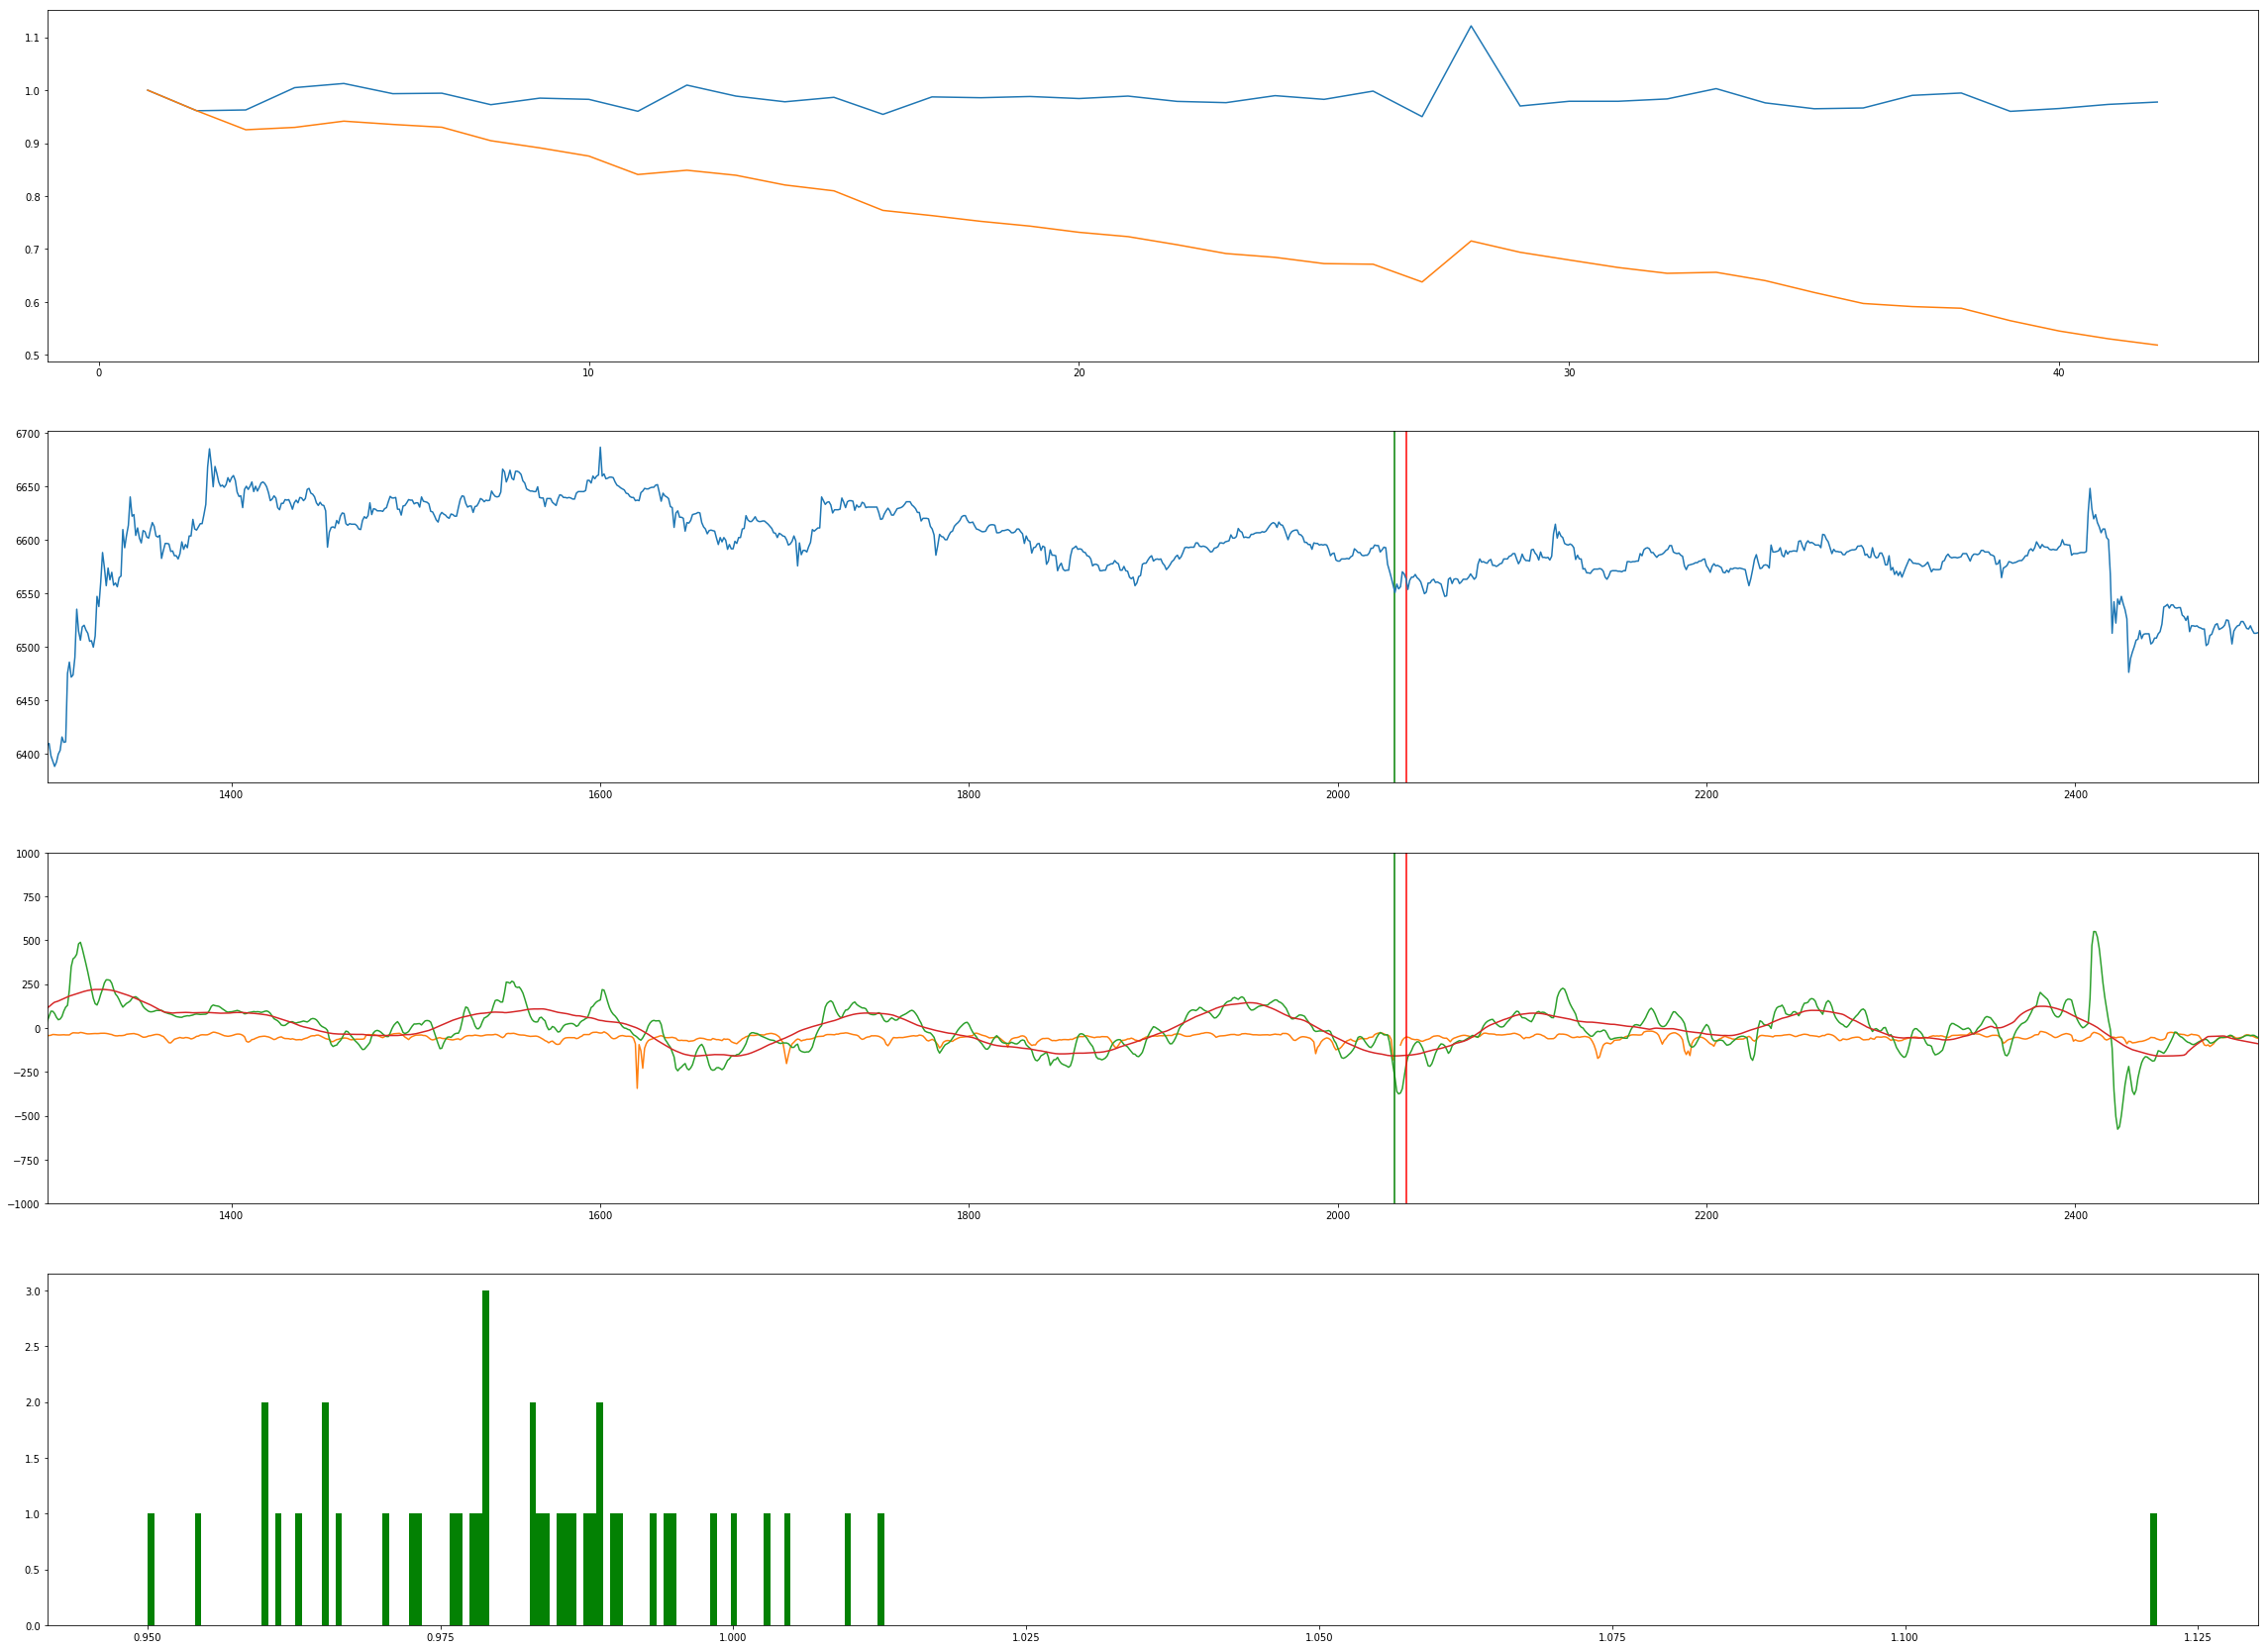

In [89]:

## Short Only ##  (Why is it backwards???)
leverage = 10


j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
var = CCI105B
X = 1
for i in range(400, length):
    cci_absolute_edge = 50
    himax[i] = RS_F_105[i]**1*cci_absolute_edge/RS_F_205[i]**1.5
    lomax[i] = 1/(RS_F_105[i]**0.5)*-1*cci_absolute_edge
    hi = himax[i]
    lo = lomax[i]
    #hi = 0
    #lo = -10
    jmax = 5
    
    if (var[i]  >= hi  and j == 0): #and (himax[i] <= lo)
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0] and X == 0:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif j == 1 and low[i] < (1-1/leverage)*price[k,0] and X == 1:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        price[k, 6] = var[i]
        j = 0
        k = k+1
    elif var[i] <= lo and (j>=1): #and var[i] >= himax[i]
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
    
    
    
J = np.arange(1300,2500)




plt.subplot(4,1,3)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
axes.set_ylim([-1000, 1000])
plt.subplot(3,1,1)

#plt.subplot(3,1,1)
#plt.plot(range())
plt.subplot(4,1,2)
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.plot(J, close[J])
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
#plt.subplot(3,1,1)
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,1)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl,300, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(np.median(pnl))
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()

In [ ]:

1/leverage

C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


nan


C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: min() arg is an empty sequence

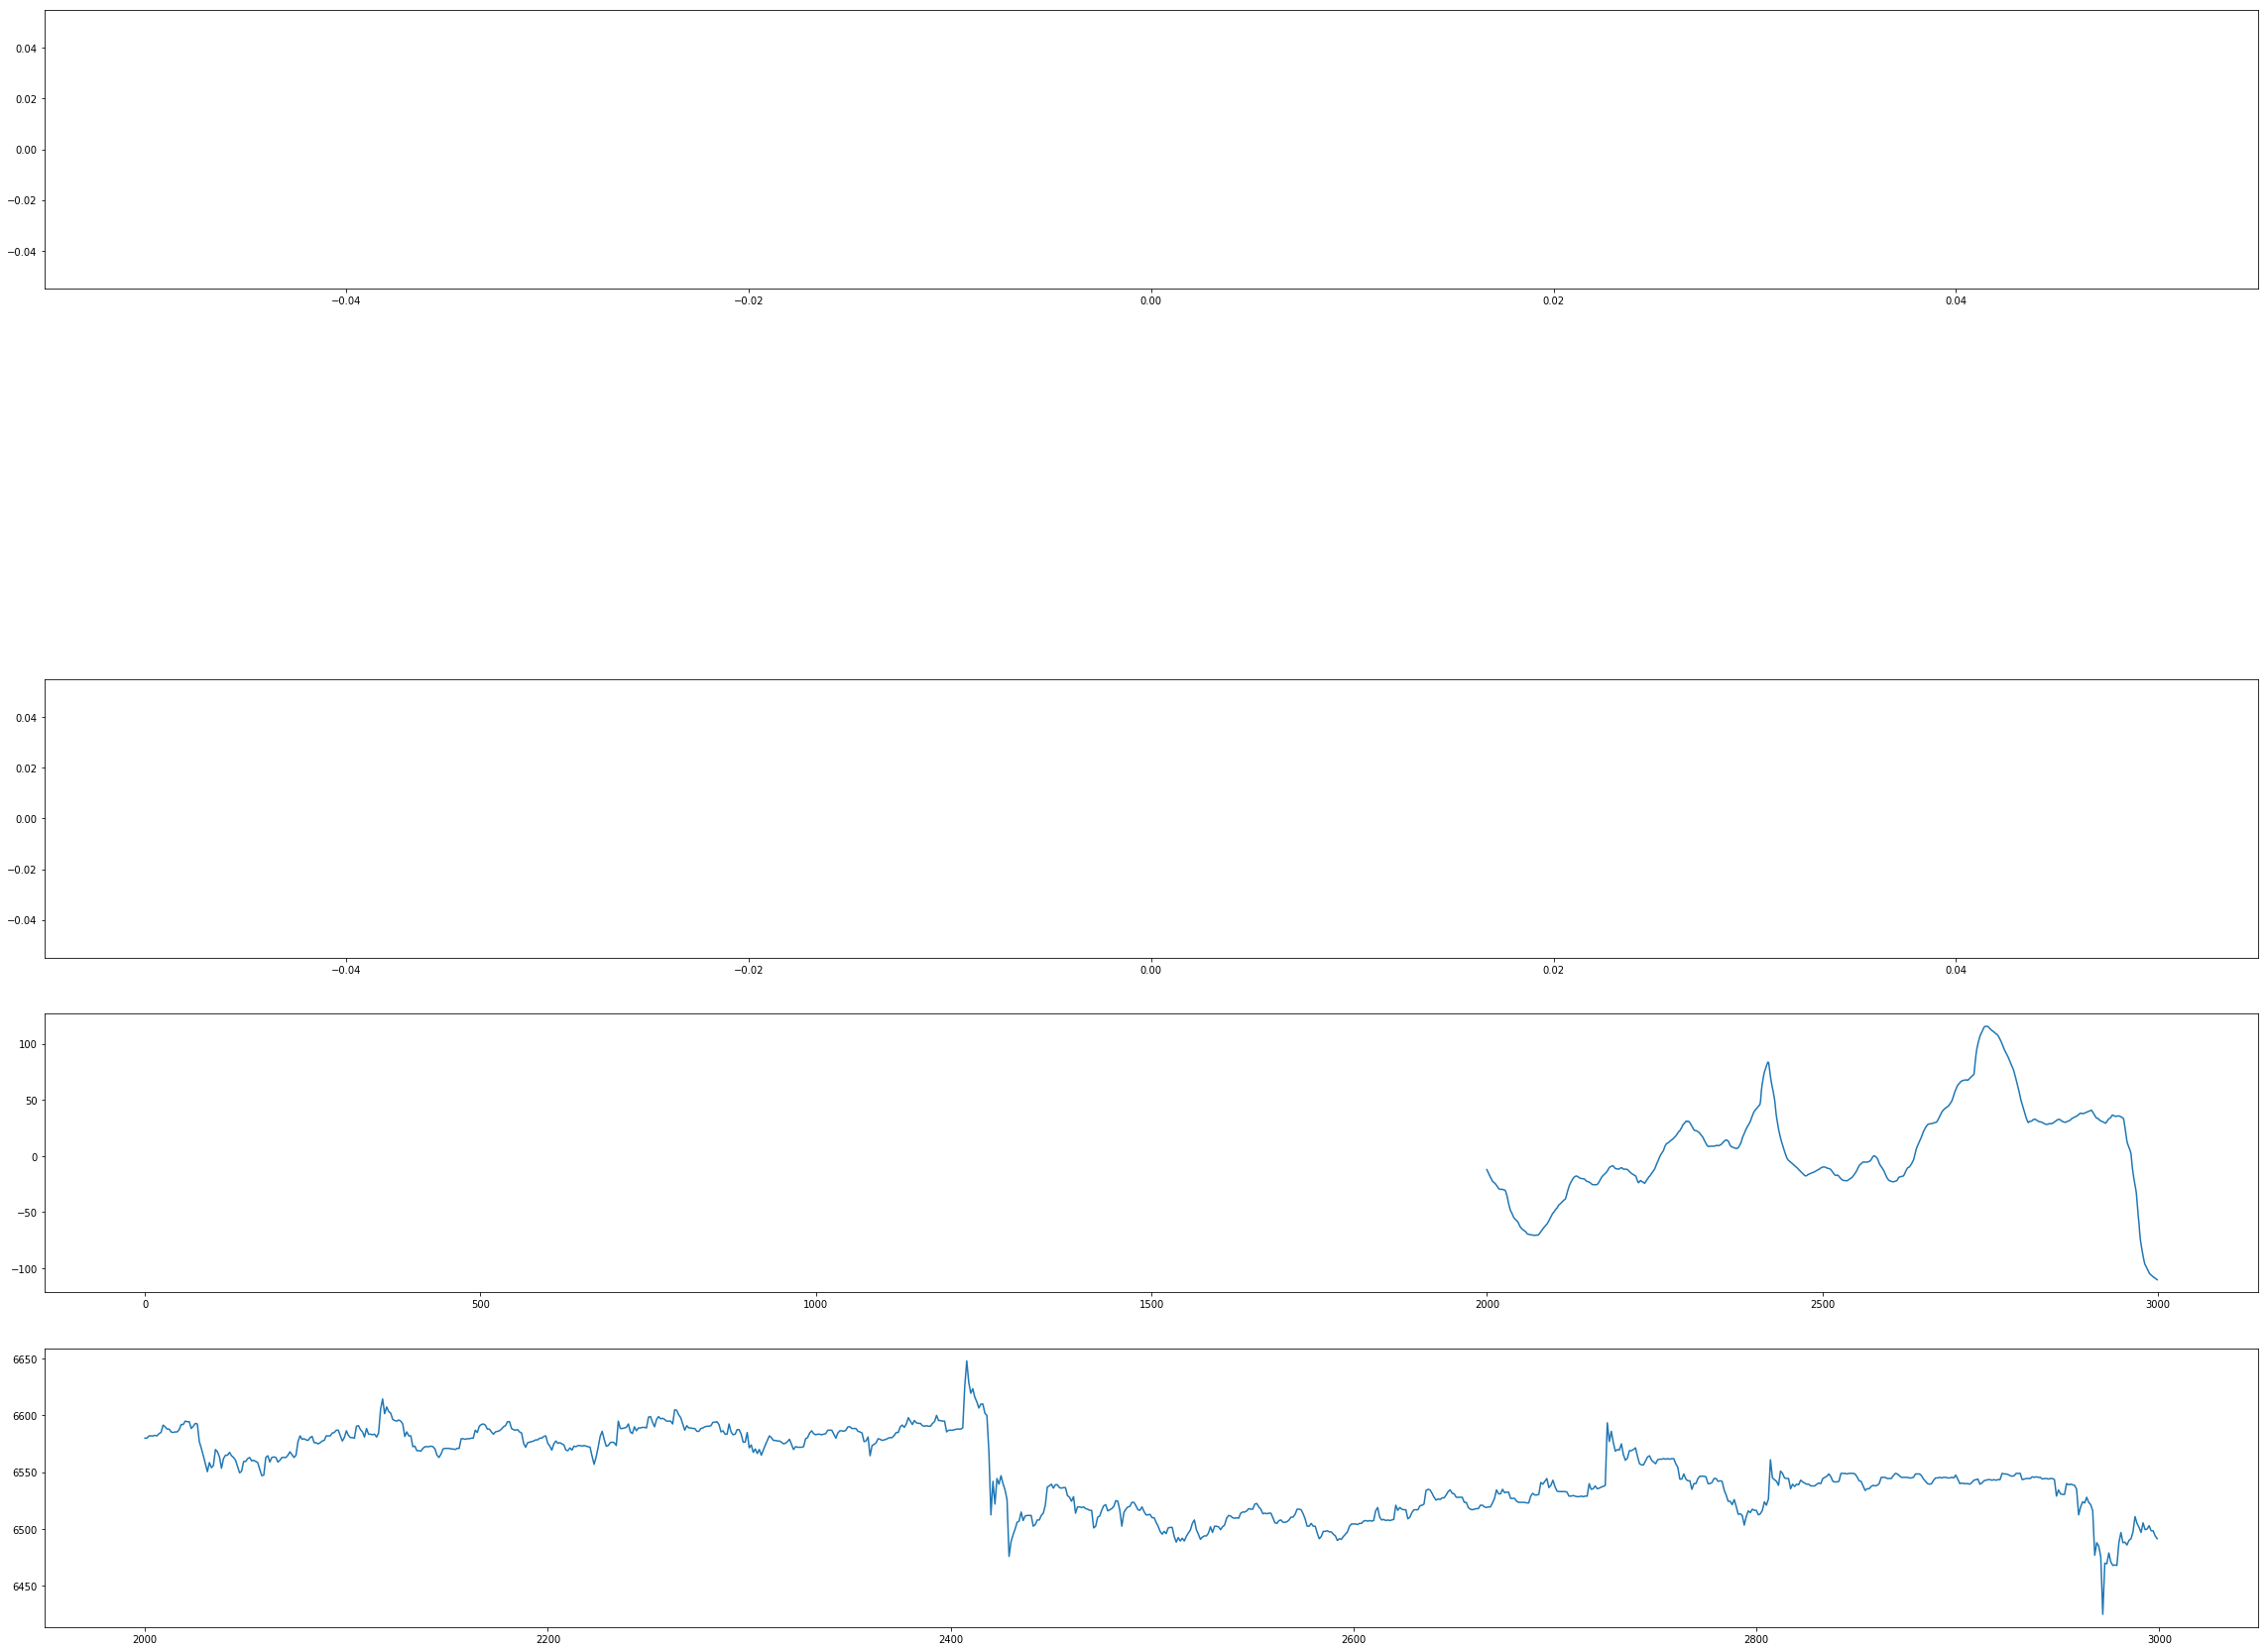

In [ ]:
close[27]

In [15]:
print(CCI1495)

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
           ...    
10470    36.033704
10471    36.063269
10472    36.095603
10473    36.007714
10474    35.660769
10475    35.142610
10476    34.648550
10477    34.145921
10478    33.765083
10479    33.434658
10480    33.151920
10481    32.913888
10482    32.650320
10483    32.429242
10484    32.179344
10485    31.937025
10486    31.734747
10487    31.441755
10488    30.949647
10489    30.194415
10490    29.398914
10491    28.

In [ ]:
name

In [ ]:
price.loc[52, 'time']

In [ ]:
print(pd.DataFrame(CCIAli105B))

In [ ]:
4.579964*1.5759

In [ ]:
(7544/7416 - 1-.00075*2)*100

In [ ]:
price.iloc[25, 1]

In [ ]:
high[price]

In [ ]:
1+1/leverage

In [ ]:
np.where(pnlT>10)

In [ ]:
np.where(pnlT>1000)

In [ ]:
price.loc[31, 'time']

In [ ]:
d

In [ ]:
price.loc[71, 'time']

In [ ]:
price[5:10,2]

In [ ]:
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:
print(RS_F)

In [ ]:
plt.plot(J, RS_F_205[J])

In [ ]:
RS_F_205

In [ ]:
name

In [ ]:
high[-1:]

In [ ]:
high[10:95]

In [ ]:
name = '7_Jun20.csv'

In [4]:
## CCI and RSI init only ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
length = len(close)
l = length
CCIAli = pd.Series(np.zeros(l))
CCIAli106 = pd.Series(np.zeros(l))
CCIAli106B = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len= 95
TP = (high+low+close)/3
for i in range(cci_len, length):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = mad(TP[i-cci_len:i])
    if madmat[i] == 0:
        CCIAli[i] = CCIAli[i-1]
    else: 
        CCIAli[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0

k = 0
#CCIAli105 = sp.signal.savgol_filter(CCIAli, 105, 3)
CCIAli105B = sp.signal.savgol_filter(CCIAli, 205, 3)

CCI1495 = pd.Series(np.zeros(l))
w = 1495
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-w:i],w,5)
        CCI1495[i] = CCI105[-1:]
time3 = pd.Series(datetime.datetime.now().timetuple())

           #print(RSIclose[i])
Mytime = (time3[5]-time2[5])
print(Mytime)


39


In [29]:
CCI1495 = pd.Series(np.zeros(l))
w = 205
for i in range(cci_len+1495, l):
    if i > cci_len+w:
        CCI1051 = sp.signal.savgol_filter(CCIAli[i-w:i],w,5)
        CCI1495[i] = CCI1051[-1:]

In [44]:
## CCI and RSI init only ## ##CCI25 ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
length = len(close)
l = length
CCIAli25 = pd.Series(np.zeros(l))
CCIAli106 = pd.Series(np.zeros(l))
CCIAli106B = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len_35= 25
TP = (high+low+close)/3
for i in range(cci_len, length):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = mad(TP[i-cci_len:i])
    if madmat[i] == 0:
        CCIAli25[i] = CCIAli25[i-1]
    else: 
        CCIAli25[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0
#CCIAli105 = sp.signal.savgol_filter(CCIAli, 105, 3)
CCIAli105B = sp.signal.savgol_filter(CCIAli, 205, 3)
time3 = pd.Series(datetime.datetime.now().timetuple())

           #print(RSIclose[i])
Mytime = (time3[5]-time2[5])
print(Mytime)

CCI105B = pd.Series(np.zeros(l))
w = 25
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli25[i-w:i],w,3)
        CCI105B[i] = CCI105[-1:]

-43


In [ ]:
CCI21 = pd.Series(np.zeros(l))
w = 21
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-w:i],w,3)
        CCI21[i] = CCI105[-1:]

In [ ]:
for i in range(cci_len, len(close)):
    CCIAli105[i] = sp.signal.savgol_filter(CCI[])

In [10]:
CCI1 = sp.signal.savgol_filter(CCIAli,105,3)

In [ ]:
name = '7_Jun20.csv'
M = 7
dl(M*1440, name)

In [ ]:
name = '7_Jun16.csv'

In [ ]:
def dl(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
def dl1m(start, end,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
boys_now = 1

while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        dlCCI1m(900, '1440j3_try.csv')
        
    else:
        boys_now


In [82]:
f=0
d=0
rsi_len = 19
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
        
RS_F_105 = pd.Series(np.zeros(l))
RS_F_205 = pd.Series(np.zeros(l))
w = 19
for i in range(rsi_len+w, l):
    if i > cci_len+w:
        RSF = sp.signal.savgol_filter(RS[i-w:i],w,3)
        
        RS_F_105[i] = RSF[-1:]

In [ ]:
fil = sp.signal.savgol_filter(RSI100, 105, 3)

In [52]:
f=0
d=0
rsi_len = 205
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
        
RS_F_205 = pd.Series(np.zeros(l))
w = rsi_len
for i in range(rsi_len+w, l):
    if i > cci_len+w:
        RSF = sp.signal.savgol_filter(RS[i-w:i],w,3)
        RS_F_205[i] = RSF[-1:]